In [16]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
import math

In [17]:
train_url = r"C:\Code\Python\ann\HPGe_Point_Efficiency\train.csv"
train_dataset = np.loadtxt(train_url, delimiter=',')
print(train_dataset.shape)
valid_url = r"C:\Code\Python\\ann\HPGe_Point_Efficiency\valid.csv"
valid_dataset = np.loadtxt(valid_url, delimiter=',')
print(valid_dataset.shape)
test_url = r"C:\Code\Python\ann\HPGe_Point_Efficiency\test.csv"
test_dataset = np.loadtxt(test_url, delimiter=',')
print(test_dataset.shape)
#print(test_dataset[0,0])
#print(test_dataset[0:,2])

(360, 3)
(144, 3)
(135, 3)


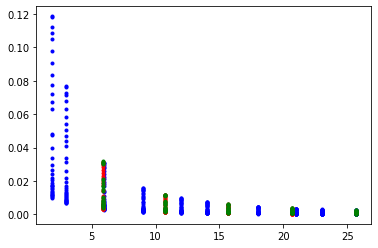

In [18]:
plt.plot(train_dataset[0:,0],train_dataset[0:,2],linewidth=0,marker='o',  markersize=3, markerfacecolor='blue', markeredgecolor='blue')
plt.plot(valid_dataset[0:,0],valid_dataset[0:,2],linewidth=0,marker='o',  markersize=3, markerfacecolor='red', markeredgecolor='red')
plt.plot(test_dataset[0:,0],test_dataset[0:,2],linewidth=0,marker='o',  markersize=3, markerfacecolor='green', markeredgecolor='green')

In [19]:
x_train = train_dataset[:,0:2]
x_train[:,0] = x_train[:,0]/26
x_train[:,1] = x_train[:,1]/2500
y_train = -np.log10(train_dataset[:,2:3])/4
x_valid = valid_dataset[:,0:2]
x_valid[:,0] = x_valid[:,0]/26
x_valid[:,1] = x_valid[:,1]/2500
y_valid = -np.log10(valid_dataset[:,2:3])/4
x_test = test_dataset[:,0:2]
x_test[:,0] = x_test[:,0]/26
x_test[:,1] = x_test[:,1]/2500
y_test = -np.log10(test_dataset[:,2:3])/4
print(x_train.shape)
print(y_train.shape)

(360, 2)
(360, 1)


In [20]:
model = Sequential()
model.add(Dense(10, input_dim=2, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 10)                30        
                                                                 
 dense_5 (Dense)             (None, 1)                 11        
                                                                 
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________


In [34]:
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss='mean_squared_error')
history = model.fit(x_train, y_train, epochs=1000, batch_size=20,validation_data=(x_valid, y_valid))
print('Model weights: ', model.get_weights())
model.save('HPGe_Point_Efficiency.h5')

Epoch 1/1000
18/18 [==============================] - 0s 10ms/step - loss: 1.5530e-05 - val_loss: 8.4265e-06
Epoch 2/1000
18/18 [==============================] - 0s 4ms/step - loss: 1.4409e-05 - val_loss: 8.6393e-06
Epoch 3/1000
18/18 [==============================] - 0s 4ms/step - loss: 1.4384e-05 - val_loss: 8.4117e-06
Epoch 4/1000
18/18 [==============================] - 0s 4ms/step - loss: 1.4396e-05 - val_loss: 8.7476e-06
Epoch 5/1000
18/18 [==============================] - 0s 4ms/step - loss: 1.4257e-05 - val_loss: 9.0278e-06
Epoch 6/1000
18/18 [==============================] - 0s 4ms/step - loss: 1.4261e-05 - val_loss: 9.1684e-06
Epoch 7/1000
18/18 [==============================] - 0s 4ms/step - loss: 1.4250e-05 - val_loss: 9.5591e-06
Epoch 8/1000
18/18 [==============================] - 0s 4ms/step - loss: 1.4447e-05 - val_loss: 8.9298e-06
Epoch 9/1000
18/18 [==============================] - 0s 5ms/step - loss: 1.4580e-05 - val_loss: 9.2507e-06
Epoch 10/1000
18/18 [======

Epoch 151/1000
18/18 [==============================] - 0s 4ms/step - loss: 1.4213e-05 - val_loss: 9.3183e-06
Epoch 152/1000
18/18 [==============================] - 0s 4ms/step - loss: 1.4143e-05 - val_loss: 9.7931e-06
Epoch 153/1000
18/18 [==============================] - 0s 4ms/step - loss: 1.4534e-05 - val_loss: 1.0152e-05
Epoch 154/1000
18/18 [==============================] - 0s 4ms/step - loss: 1.4289e-05 - val_loss: 9.2939e-06
Epoch 155/1000
18/18 [==============================] - 0s 4ms/step - loss: 1.4293e-05 - val_loss: 9.6605e-06
Epoch 156/1000
18/18 [==============================] - 0s 4ms/step - loss: 1.4373e-05 - val_loss: 9.3786e-06
Epoch 157/1000
18/18 [==============================] - 0s 4ms/step - loss: 1.4087e-05 - val_loss: 9.3713e-06
Epoch 158/1000
18/18 [==============================] - 0s 4ms/step - loss: 1.4402e-05 - val_loss: 9.2553e-06
Epoch 159/1000
18/18 [==============================] - 0s 4ms/step - loss: 1.4379e-05 - val_loss: 9.2297e-06
Epoch 160/

18/18 [==============================] - 0s 3ms/step - loss: 1.4135e-05 - val_loss: 9.6212e-06
Epoch 300/1000
18/18 [==============================] - 0s 4ms/step - loss: 1.4254e-05 - val_loss: 9.4261e-06
Epoch 301/1000
18/18 [==============================] - 0s 3ms/step - loss: 1.4321e-05 - val_loss: 9.7297e-06
Epoch 302/1000
18/18 [==============================] - 0s 3ms/step - loss: 1.4052e-05 - val_loss: 9.5419e-06
Epoch 303/1000
18/18 [==============================] - 0s 3ms/step - loss: 1.4018e-05 - val_loss: 9.3415e-06
Epoch 304/1000
18/18 [==============================] - 0s 3ms/step - loss: 1.4177e-05 - val_loss: 9.7019e-06
Epoch 305/1000
18/18 [==============================] - 0s 3ms/step - loss: 1.4174e-05 - val_loss: 9.4312e-06
Epoch 306/1000
18/18 [==============================] - 0s 3ms/step - loss: 1.4638e-05 - val_loss: 9.3118e-06
Epoch 307/1000
18/18 [==============================] - 0s 3ms/step - loss: 1.4287e-05 - val_loss: 1.0039e-05
Epoch 308/1000
18/18 [===

18/18 [==============================] - 0s 4ms/step - loss: 1.4329e-05 - val_loss: 9.1790e-06
Epoch 448/1000
18/18 [==============================] - 0s 3ms/step - loss: 1.4191e-05 - val_loss: 9.6931e-06
Epoch 449/1000
18/18 [==============================] - 0s 3ms/step - loss: 1.4503e-05 - val_loss: 9.8014e-06
Epoch 450/1000
18/18 [==============================] - 0s 3ms/step - loss: 1.4303e-05 - val_loss: 9.9306e-06
Epoch 451/1000
18/18 [==============================] - 0s 3ms/step - loss: 1.4448e-05 - val_loss: 9.2898e-06
Epoch 452/1000
18/18 [==============================] - 0s 4ms/step - loss: 1.4203e-05 - val_loss: 9.3869e-06
Epoch 453/1000
18/18 [==============================] - 0s 3ms/step - loss: 1.4059e-05 - val_loss: 9.5797e-06
Epoch 454/1000
18/18 [==============================] - 0s 3ms/step - loss: 1.4164e-05 - val_loss: 9.3032e-06
Epoch 455/1000
18/18 [==============================] - 0s 3ms/step - loss: 1.4081e-05 - val_loss: 9.2961e-06
Epoch 456/1000
18/18 [===

18/18 [==============================] - 0s 3ms/step - loss: 1.4386e-05 - val_loss: 9.1793e-06
Epoch 596/1000
18/18 [==============================] - 0s 3ms/step - loss: 1.4455e-05 - val_loss: 9.2015e-06
Epoch 597/1000
18/18 [==============================] - 0s 3ms/step - loss: 1.4078e-05 - val_loss: 9.3863e-06
Epoch 598/1000
18/18 [==============================] - 0s 3ms/step - loss: 1.4354e-05 - val_loss: 1.0034e-05
Epoch 599/1000
18/18 [==============================] - 0s 3ms/step - loss: 1.4138e-05 - val_loss: 9.4824e-06
Epoch 600/1000
18/18 [==============================] - 0s 3ms/step - loss: 1.3975e-05 - val_loss: 9.3154e-06
Epoch 601/1000
18/18 [==============================] - 0s 3ms/step - loss: 1.4093e-05 - val_loss: 9.4654e-06
Epoch 602/1000
18/18 [==============================] - 0s 3ms/step - loss: 1.4532e-05 - val_loss: 9.2827e-06
Epoch 603/1000
18/18 [==============================] - 0s 4ms/step - loss: 1.4017e-05 - val_loss: 9.4959e-06
Epoch 604/1000
18/18 [===

18/18 [==============================] - 0s 4ms/step - loss: 1.4053e-05 - val_loss: 9.4015e-06
Epoch 744/1000
18/18 [==============================] - 0s 4ms/step - loss: 1.4185e-05 - val_loss: 9.9413e-06
Epoch 745/1000
18/18 [==============================] - 0s 3ms/step - loss: 1.4003e-05 - val_loss: 9.3459e-06
Epoch 746/1000
18/18 [==============================] - 0s 4ms/step - loss: 1.3949e-05 - val_loss: 9.3690e-06
Epoch 747/1000
18/18 [==============================] - 0s 4ms/step - loss: 1.3929e-05 - val_loss: 9.8745e-06
Epoch 748/1000
18/18 [==============================] - 0s 4ms/step - loss: 1.4272e-05 - val_loss: 9.7156e-06
Epoch 749/1000
18/18 [==============================] - 0s 4ms/step - loss: 1.4037e-05 - val_loss: 9.6497e-06
Epoch 750/1000
18/18 [==============================] - 0s 3ms/step - loss: 1.4329e-05 - val_loss: 9.5229e-06
Epoch 751/1000
18/18 [==============================] - 0s 3ms/step - loss: 1.3922e-05 - val_loss: 9.6060e-06
Epoch 752/1000
18/18 [===

18/18 [==============================] - 0s 3ms/step - loss: 1.3954e-05 - val_loss: 9.2259e-06
Epoch 892/1000
18/18 [==============================] - 0s 4ms/step - loss: 1.4151e-05 - val_loss: 9.3072e-06
Epoch 893/1000
18/18 [==============================] - 0s 4ms/step - loss: 1.3979e-05 - val_loss: 9.6617e-06
Epoch 894/1000
18/18 [==============================] - 0s 4ms/step - loss: 1.3940e-05 - val_loss: 9.2710e-06
Epoch 895/1000
18/18 [==============================] - 0s 4ms/step - loss: 1.4121e-05 - val_loss: 9.2395e-06
Epoch 896/1000
18/18 [==============================] - 0s 4ms/step - loss: 1.4117e-05 - val_loss: 9.2876e-06
Epoch 897/1000
18/18 [==============================] - 0s 4ms/step - loss: 1.4148e-05 - val_loss: 9.4553e-06
Epoch 898/1000
18/18 [==============================] - 0s 3ms/step - loss: 1.4030e-05 - val_loss: 9.4023e-06
Epoch 899/1000
18/18 [==============================] - 0s 4ms/step - loss: 1.4443e-05 - val_loss: 9.6973e-06
Epoch 900/1000
18/18 [===

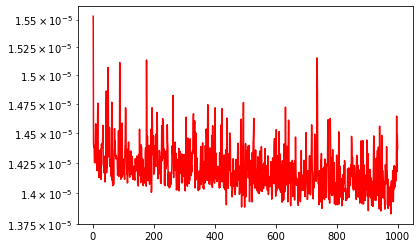

In [35]:
training_loss = history.history['loss']
epoch_count = range(1, len(training_loss) + 1)
plt.yscale("log")
plt.plot(epoch_count, training_loss, 'r-')

0.42452154440406253
99.78363236148634


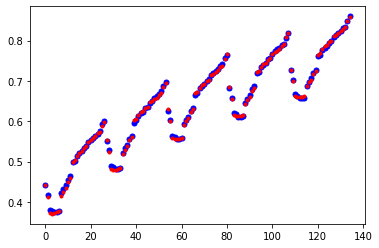

In [36]:
model = tf.keras.models.load_model('HPGe_Point_Efficiency.h5')
y_predict = model.predict(x_test)
error = np.abs((y_predict-y_test)/y_test)
recovery = np.abs(y_predict/y_test)
print(np.average(error)*100)
print(np.average(recovery)*100)
plt.plot(range(y_test.size),y_test,linewidth=0,marker='o',  markersize=5, markerfacecolor='blue', markeredgecolor='blue')
plt.plot(range(y_test.size),y_predict,linewidth=0,marker='o',  markersize=3, markerfacecolor='red', markeredgecolor='red')

0.023198809339436136
1.0108097201254416
0.00037082961549944084
0.0001524264200104122


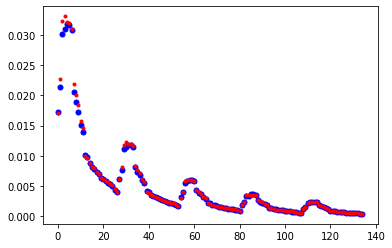

In [40]:
model = tf.keras.models.load_model('HPGe_Point_Efficiency.h5')
y_predict = model.predict(x_test)

relative_error = np.average(np.abs((np.power(10,-y_predict*4)-np.power(10,-y_test*4))/np.power(10,-y_test*4)))
recovery = np.average(np.abs(np.power(10,-y_predict*4)/np.power(10,-y_test*4)))
rmse = np.power(np.average(np.power(np.power(10,-y_predict*4)-np.power(10,-y_test*4),2)),0.5)
mae = np.average(np.abs(np.power(10,-y_predict*4)-np.power(10,-y_test*4)))

print(relative_error)
print(recovery)
print(rmse)
print(mae)

plt.plot(range(y_test.size),np.power(10,-y_test*4),linewidth=0,marker='o',  markersize=5, markerfacecolor='blue', markeredgecolor='blue')
plt.plot(range(y_test.size),np.power(10,-y_predict*4),linewidth=0,marker='o',  markersize=3, markerfacecolor='red', markeredgecolor='red')

In [41]:
print(np.power(10,-y_predict*4))

[[0.01713741]
 [0.02267646]
 [0.03222632]
 [0.033092  ]
 [0.03211322]
 [0.03203418]
 [0.03091957]
 [0.02189537]
 [0.02001826]
 [0.01845344]
 [0.01580933]
 [0.01466833]
 [0.0100056 ]
 [0.00967347]
 [0.00879213]
 [0.00817478]
 [0.00788492]
 [0.00730199]
 [0.00705288]
 [0.00633215]
 [0.00606087]
 [0.00584272]
 [0.0056198 ]
 [0.00527071]
 [0.00509172]
 [0.00441978]
 [0.00407021]
 [0.00608545]
 [0.00811738]
 [0.01185377]
 [0.01223045]
 [0.01200377]
 [0.01197683]
 [0.01159099]
 [0.00834763]
 [0.0076551 ]
 [0.0070735 ]
 [0.00608342]
 [0.00565443]
 [0.00391619]
 [0.00379534]
 [0.00347774]
 [0.00325757]
 [0.00315451]
 [0.00294673]
 [0.00285725]
 [0.00259299]
 [0.00249039]
 [0.00240621]
 [0.00231838]
 [0.00217671]
 [0.00210193]
 [0.00180827]
 [0.00165009]
 [0.00302514]
 [0.00399279]
 [0.00582508]
 [0.00602335]
 [0.00598102]
 [0.00596967]
 [0.00580416]
 [0.00432566]
 [0.0039933 ]
 [0.00370929]
 [0.00321545]
 [0.00299753]
 [0.00209671]
 [0.00203365]
 [0.00186808]
 [0.00175325]
 [0.00169935]
 [0.00